# CPSC 483 - Project 3  

### William Au  

In [1]:
import csv
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
def Question1(dataset):
    
    # Importing dataset1
    df = pd.read_csv(dataset, header=None)
    x_one = df[[0, 1]]
    t_one = np.ravel(df[[2]])
    
    # Linear kernel
    clf = svm.SVC(kernel='linear')
    clf.fit(x_one, t_one)
    clf_score = clf.score(x_one, t_one)
    # Printing score
    print("Linear score: ", clf_score)
    
Question1("dataset1.csv")    

Linear score:  1.0


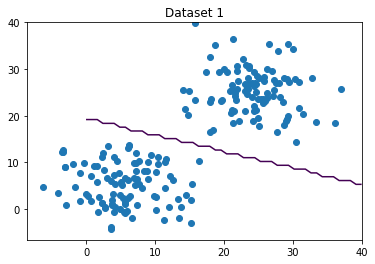

In [3]:
def Question2(dataset, dataName):
    
    # Boundaries
    xx, yy = np.meshgrid(np.linspace(0, 40), np.linspace(0, 40))
    
    # Importing dataset1
    df = pd.read_csv(dataset, header=None)
    x_one = df[[0, 1]].to_numpy()
    t_one = np.ravel(df[[2]])
    
    # Linear kernel
    clf = svm.SVC(kernel='linear')
    clf.fit(x_one, t_one)
    
    # Predictions
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z[:].reshape(xx.shape)
    
    # Plotting data
    fig, ax = plt.subplots()
    ax.scatter(x_one[:, 0], x_one[:, 1], cmap=plt.cm.binary, zorder=2)
    ax.contour(xx, yy, z, [0.5])
    ax.set(title=dataName)
    
Question2("dataset1.csv", "Dataset 1")

Poly score:  1.0
rbf score:  1.0
Sigmoid score:  0.16

Yes. The decision boundaries are different even though the same training data was used. 


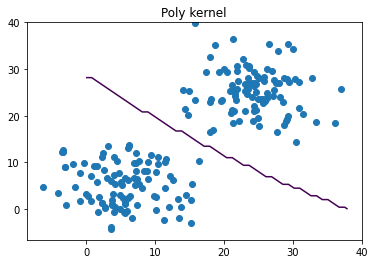

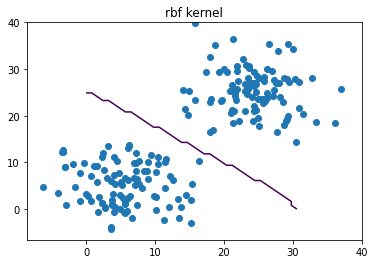

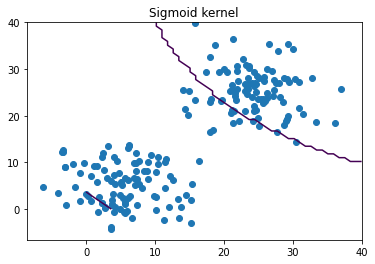

In [4]:
def Question3(dataset, answerQuestion):
    
    # Boundaries
    xx, yy = np.meshgrid(np.linspace(0, 40), np.linspace(0, 40))
    
    # Importing dataset1
    df = pd.read_csv(dataset, header=None)
    x_one = df[[0, 1]].to_numpy()
    t_one = np.ravel(df[[2]])
    
    # Poly kernel
    ply = svm.SVC(kernel='poly')
    ply.fit(x_one, t_one)
    ply_score = ply.score(x_one, t_one)
    
    # rbf kernel
    rbf = svm.SVC(kernel='rbf')
    rbf.fit(x_one, t_one)
    rbf_score = rbf.score(x_one, t_one)
    
    # Sigmoid kernel
    sig = svm.SVC(kernel='sigmoid')
    sig.fit(x_one, t_one)
    sig_score = sig.score(x_one, t_one)
    
    # Plot poly
    z = ply.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z[:].reshape(xx.shape)
    fix, ax = plt.subplots()
    ax.scatter(x_one[:, 0], x_one[:, 1], cmap=plt.cm.binary, zorder=2)
    ax.contour(xx, yy, z, [0.5])
    ax.set(title="Poly kernel")
    
    # Plot rbf
    z = rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z[:].reshape(xx.shape)
    fix, ax = plt.subplots()
    ax.scatter(x_one[:, 0], x_one[:, 1], cmap=plt.cm.binary, zorder=2)
    ax.contour(xx, yy, z, [0.5])
    ax.set(title="rbf kernel")
    
    # Plot sigmoid
    z = sig.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z[:].reshape(xx.shape)
    fix, ax = plt.subplots()
    ax.scatter(x_one[:, 0], x_one[:, 1], cmap=plt.cm.binary, zorder=2)
    ax.contour(xx, yy, z, [0.5])
    ax.set(title="Sigmoid kernel")
    
    # Print kernel scores
    print("Poly score: ", ply_score)
    print("rbf score: ", rbf_score)
    print("Sigmoid score: ", sig_score)
    if answerQuestion:
        print()
        print("Yes. The decision boundaries are different even though the same training data was used. ")
    
Question3("dataset1.csv", True)

Linear score:  0.62
Poly score:  0.815
rbf score:  1.0
Sigmoid score:  0.42

The best kernal was rbf. It is the only one of the four that correctly classified all of the datapoints. 


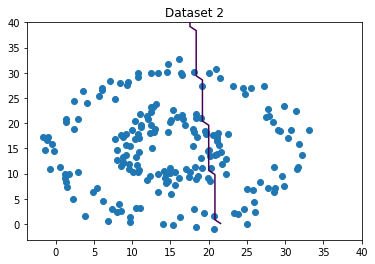

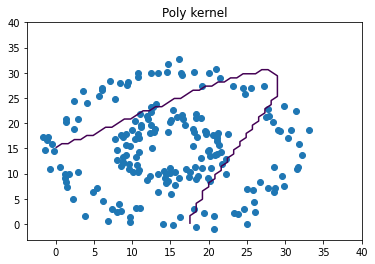

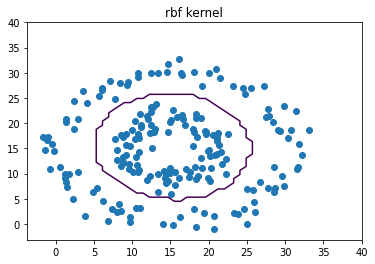

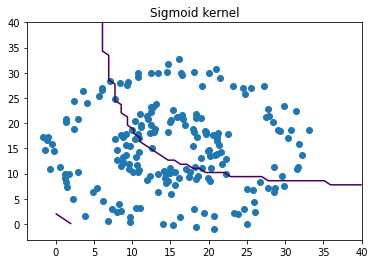

In [5]:
def Question4():
    
    Question1("dataset2.csv")
    Question2("dataset2.csv", "Dataset 2")
    Question3("dataset2.csv", False)
    print()
    print("The best kernal was rbf. It is the only one of the four that correctly classified all of the datapoints. ")
    
Question4()

Dataset 1
Poly 3rd degree score:  1.0
Poly 5th degree score:  1.0

Dataset 2
Poly 3rd degree score:  0.815
Poly 5th degree score:  0.88

Based on Dataset 2: 
Confusion Matrix 3rd Degree: 
            true
Predicted:  96 33
            4 67

Confusion Matrix 5th Degree: 
            true
Predicted:  99 23
            1 77

The largest difference of the is the reduction of false positives by the 5th degree. The 3rd degree misclassifies datapoints on the upper right hand side, while the 5th classifies them correctly. 


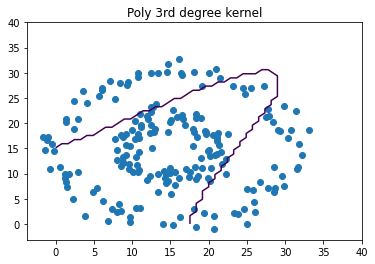

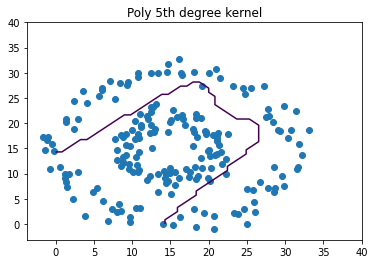

In [6]:
def Question5():
    
    # Boundaries
    xx, yy = np.meshgrid(np.linspace(0, 40), np.linspace(0, 40))
    
    # Importing dataset1
    df = pd.read_csv("dataset1.csv", header=None)
    x_one = df[[0, 1]].to_numpy()
    t_one = np.ravel(df[[2]])
    
    # Poly kernel
    ply = svm.SVC(kernel='poly')
    ply.fit(x_one, t_one)
    ply_score = ply.score(x_one, t_one)
    
    # Poly kernel 5th degree
    ply5 = svm.SVC(kernel='poly', degree=5, gamma='scale')
    ply5.fit(x_one, t_one)
    ply5_score = ply5.score(x_one, t_one)
    
    # Printing poly scores for Dataset 1
    print("Dataset 1")
    print("Poly 3rd degree score: ", ply_score)
    print("Poly 5th degree score: ", ply5_score)
    print()
    
    # Importing dataset1
    df = pd.read_csv("dataset2.csv", header=None)
    x_one = df[[0, 1]].to_numpy()
    t_one = np.ravel(df[[2]])
    
    # Poly kernel
    ply = svm.SVC(kernel='poly')
    ply.fit(x_one, t_one)
    ply_score = ply.score(x_one, t_one)
    
    # Poly kernel 5th degree
    ply5 = svm.SVC(kernel='poly', degree=5, gamma='scale')
    ply5.fit(x_one, t_one)
    ply5_score = ply5.score(x_one, t_one)
    
    print("Dataset 2")
    print("Poly 3rd degree score: ", ply_score)
    print("Poly 5th degree score: ", ply5_score)
    
    # Boundaries
    xx, yy = np.meshgrid(np.linspace(0, 40), np.linspace(0, 40))
    
    # Plot 3rd degree poly
    z = ply.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z[:].reshape(xx.shape)
    fix, ax = plt.subplots()
    ax.scatter(x_one[:, 0], x_one[:, 1], cmap=plt.cm.binary, zorder=2)
    ax.contour(xx, yy, z, [0.5])
    ax.set(title="Poly 3rd degree kernel")
    
    # Plot 5th degree poly
    z = ply5.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z[:].reshape(xx.shape)
    fix, ax = plt.subplots()
    ax.scatter(x_one[:, 0], x_one[:, 1], cmap=plt.cm.binary, zorder=2)
    ax.contour(xx, yy, z, [0.5])
    ax.set(title="Poly 5th degree kernel")
    
    # Confusion matrices
    pred3rd = ply.predict(x_one)
    pred5th = ply5.predict(x_one)
    tn3, fp3, fn3, tp3 = confusion_matrix(t_one, pred3rd).ravel()
    tn5, fp5, fn5, tp5 = confusion_matrix(t_one, pred5th).ravel()
    
    print()
    print("Based on Dataset 2: ")
    print("Confusion Matrix 3rd Degree: ")
    print("            true")
    print("Predicted: ", tp3, fp3)
    print("           ", fn3, tn3)
    print()
    
    print("Confusion Matrix 5th Degree: ")
    print("            true")
    print("Predicted: ", tp5, fp5)
    print("           ", fn5, tn5)
    print()
    print("The largest difference of the is the reduction of false positives by the 5th degree. The 3rd degree "
         "misclassifies datapoints on the upper right hand side, while the 5th classifies them correctly. ")
    
Question5()

Linear score:  0.88
Poly score:  0.915
rbf score:  1.0
Sigmoid score:  0.62

The rbf kernel provided the best decision boundary. 
The poly kernel should have had a higher score because the data is shaped in a polynomial fashion. 


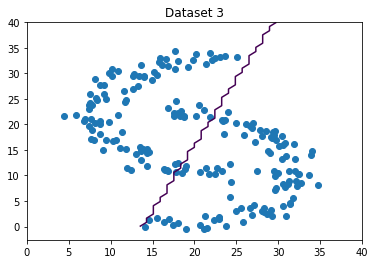

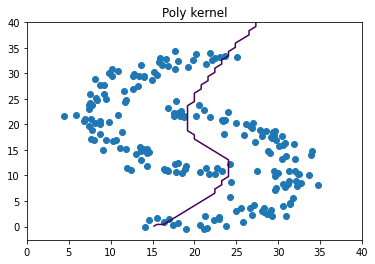

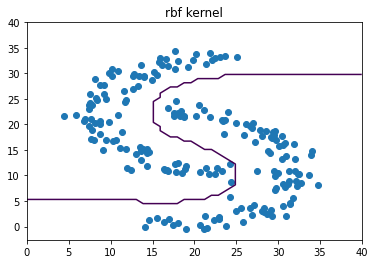

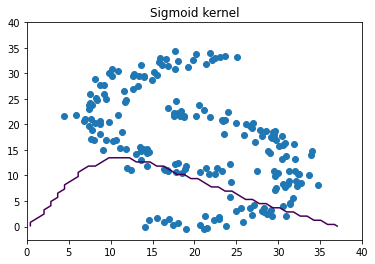

In [7]:
def Question6():
    
    Question1("dataset3.csv")
    Question2("dataset3.csv", "Dataset 3")
    Question3("dataset3.csv", False)
    print()
    print("The rbf kernel provided the best decision boundary. ")
    print("The poly kernel should have had a higher score because the data is shaped in a polynomial fashion. ")
    
Question6()

Best parameters: 
     C: 0.1
Degree:  5
 Coef0:  1.0
Confusion Matrix: 
            true
predicted  100 0
           0 100

Grid search has the best results for the poly kernel with C = 0.1, degree = 5, and coef0 = 1.0. The confusion matrix also verifies these results. 


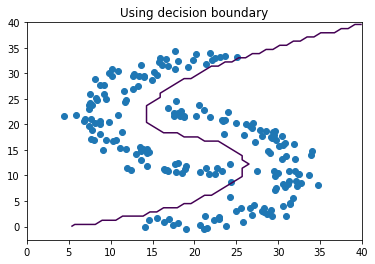

In [8]:
def Question7():
    
    # Importing dataset1
    df = pd.read_csv("dataset3.csv", header=None)
    x_one = df[[0, 1]].to_numpy()
    t_one = np.ravel(df[[2]])
    
    # Boundaries
    xx, yy = np.meshgrid(np.linspace(0, 40), np.linspace(0, 40))
    
    # Grid search
    params = [{'C': [0.001, 0.01, 0.1, 1.0], 'degree': [3,5,7], 'coef0': [0.01, 0.1, 1.0],
               'gamma': ['scale'], 'kernel': ['poly']}]
    
    svc = svm.SVC()
    clf = GridSearchCV(svc, params, cv=5)
    clf.fit(x_one, t_one)
    poly_bestfit = svm.SVC(C=0.1, kernel='poly', degree=5, coef0=1.0)
    poly_bestfit.fit(x_one, t_one)
    
    # Plot
    z = poly_bestfit.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z[:].reshape(xx.shape)
    fix, ax = plt.subplots()
    ax.scatter(x_one[:, 0], x_one[:, 1], cmap=plt.cm.binary, zorder=2)
    ax.contour(xx, yy, z, [0.5])
    ax.set(title="Using decision boundary")
    
    # Confusion matrix
    predict = poly_bestfit.predict(x_one)
    tn, fp, fn, tp = confusion_matrix(t_one, predict).ravel()
    
    # Print results
    print("Best parameters: ")
    print("     C:", clf.best_params_['C'])
    print("Degree: ", clf.best_params_['degree'])
    print(" Coef0: ", clf.best_params_['coef0'])
    
    print("Confusion Matrix: ")
    print("            true")
    print("predicted ", tp, fp)
    print("          ", fn, tn)
    print()
    print("Grid search has the best results for the poly kernel with C = 0.1, degree = 5, and coef0 = 1.0. "
         "The confusion matrix also verifies these results. ")
    

Question7()